In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
import pickle
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model, load_model
import scipy

/home/sudeep/.conda/envs/Keras2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import preprocess_input

In [3]:
model = VGG16(weights='imagenet', include_top=False)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [5]:
IMAGES_DIR = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/img/"
TRAINING_IMAGES = "/home/sudeep/Work/Image Segmentation/benchmark_RELEASE/dataset/train.txt"
train_images = open(TRAINING_IMAGES).read().split('\n')[:-1]

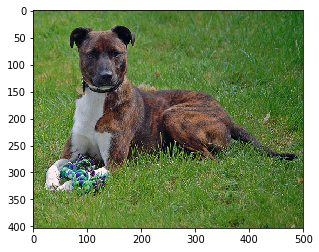

In [6]:
x = np.random.randint(len(train_images))
image = plt.imread(IMAGES_DIR+train_images[x]+'.jpg')
plt.imshow(image)

In [7]:
image.shape

(403, 500, 3)

In [8]:
processed_image = preprocess_input(np.array([image], dtype=np.float64))

In [9]:
processed_image.shape

(1, 403, 500, 3)

In [10]:
get_layer_output = {}
for i in range(len(model.layers)):
    get_layer_output[str(i)] = K.function([model.layers[0].input], [model.layers[i].output])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
get_layer_output

{'0': <keras.backend.tensorflow_backend.Function at 0x7f04174fdcf8>,
 '1': <keras.backend.tensorflow_backend.Function at 0x7f041749ce48>,
 '10': <keras.backend.tensorflow_backend.Function at 0x7f041749c710>,
 '11': <keras.backend.tensorflow_backend.Function at 0x7f04174af4a8>,
 '12': <keras.backend.tensorflow_backend.Function at 0x7f04174af240>,
 '13': <keras.backend.tensorflow_backend.Function at 0x7f04174af3c8>,
 '14': <keras.backend.tensorflow_backend.Function at 0x7f04174af278>,
 '15': <keras.backend.tensorflow_backend.Function at 0x7f04174af128>,
 '16': <keras.backend.tensorflow_backend.Function at 0x7f04174af748>,
 '17': <keras.backend.tensorflow_backend.Function at 0x7f04174af828>,
 '18': <keras.backend.tensorflow_backend.Function at 0x7f04174af908>,
 '2': <keras.backend.tensorflow_backend.Function at 0x7f041749cac8>,
 '3': <keras.backend.tensorflow_backend.Function at 0x7f041749cdd8>,
 '4': <keras.backend.tensorflow_backend.Function at 0x7f041749cc88>,
 '5': <keras.backend.tens

In [13]:
layer0 = get_layer_output["0"]([processed_image])[0]
layer0.shape

(1, 403, 500, 3)

In [14]:
layer1 = get_layer_output["1"]([processed_image])[0]
layer1.shape

(1, 403, 500, 64)

In [15]:
layer3 = get_layer_output["3"]([processed_image])[0]
layer3.shape

(1, 201, 250, 64)

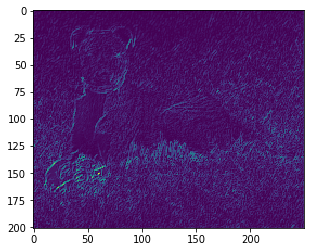

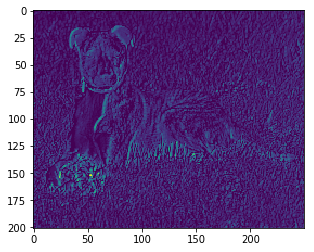

In [16]:
plt.imshow(layer3[0][:, :, 0])
plt.show()
plt.imshow(layer3[0][:, :, 12])
plt.show()

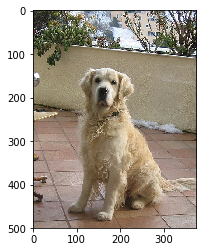

In [34]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from PIL import Image

#model = VGG16(weights='imagenet', include_top=False)
x = np.random.randint(len(train_images))
img_path = train_images[x]
img = image.load_img(IMAGES_DIR+img_path+'.jpg')#, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


(1, 250, 187, 64)


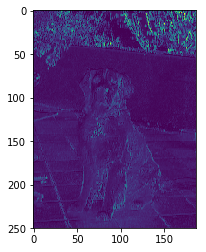

In [37]:
layer3 = get_layer_output["3"]([x])[0]
print(layer3.shape)
plt.imshow(layer3[0, :, :, 11])